<a href="https://colab.research.google.com/github/bowie0713/Example-/blob/main/Magic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset 


In [6]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names = cols) #assign column names to the datasets generated by pandas
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
df['class'].unique() #generate datatype for the column

array(['g', 'h'], dtype=object)

In [7]:
df['class'] = (df['class'] == 'g').astype(int) # convert anything with 'g' to 1 and anything else to 0
# computer is not smart in identifying characters, but numbers

In [11]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


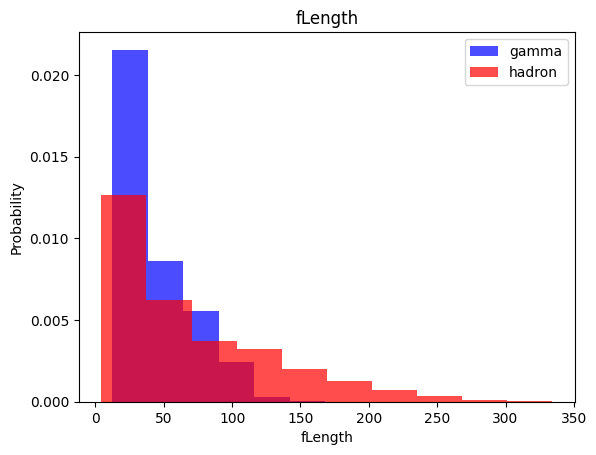

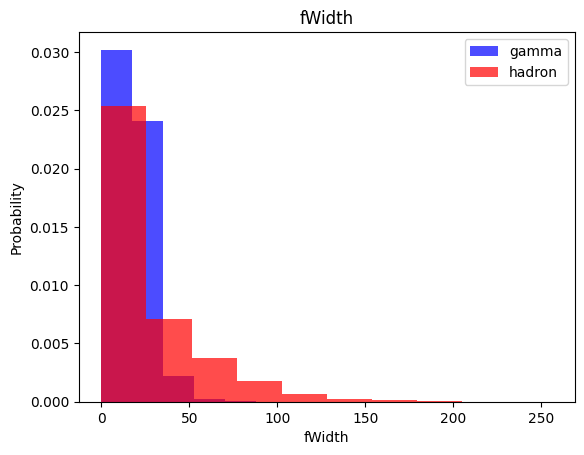

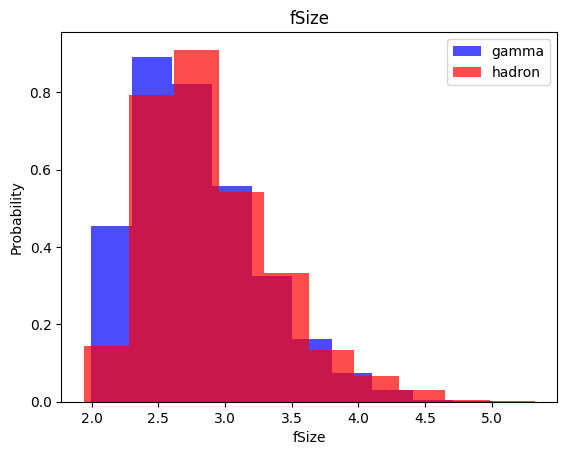

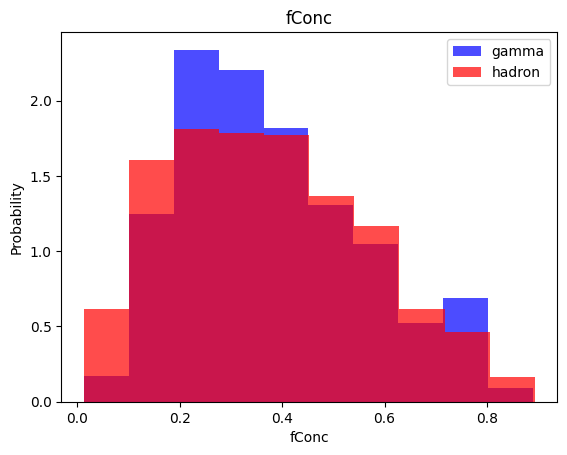

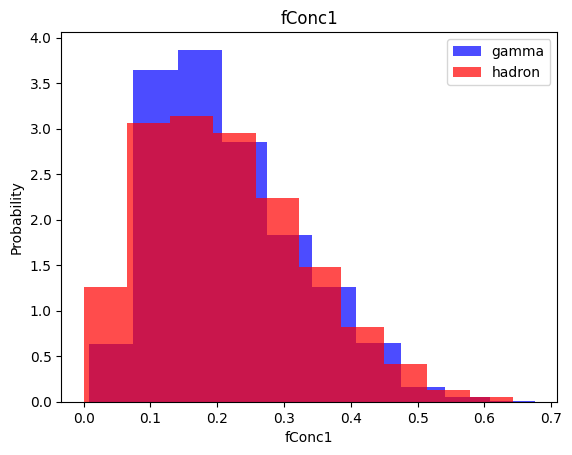

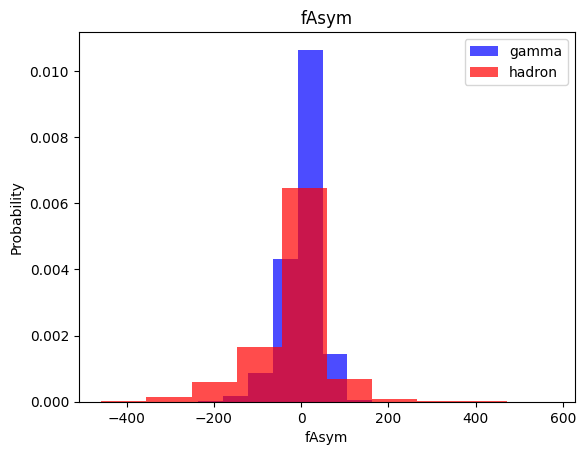

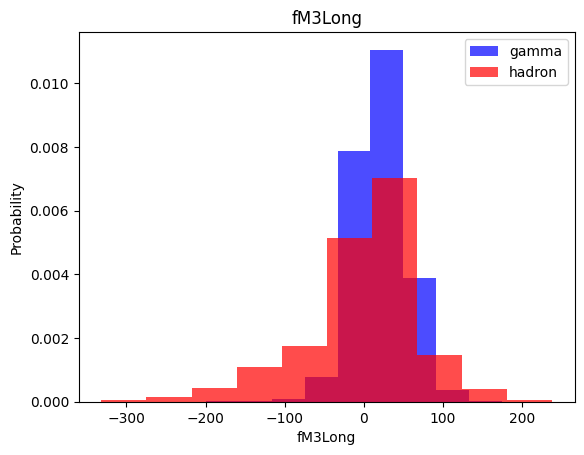

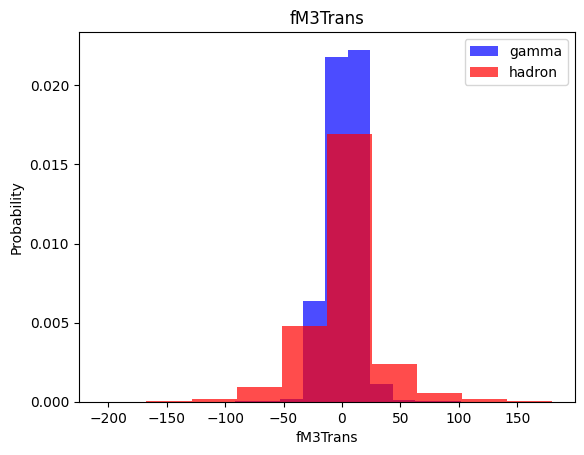

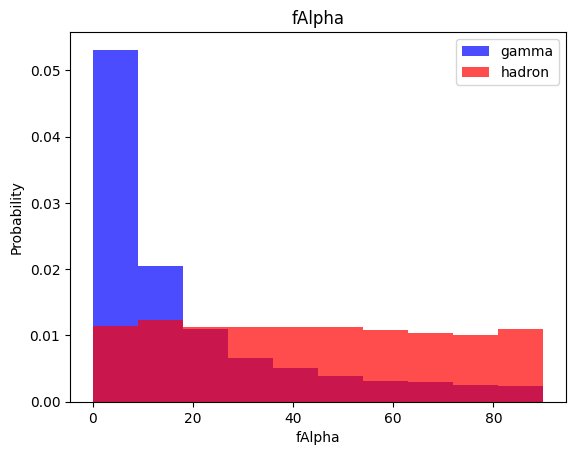

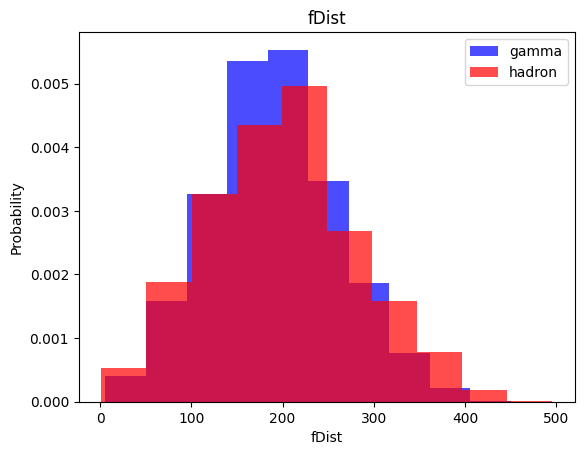

In [12]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True) # density = True normalizes distribution
  plt.hist(df[df['class']==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show() # display all 11 histogram

#Train, Validation, Test Datasets


In [8]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))]) # randomly shuffle data, everything btw 60% - 80% of data will go to validation, rest go to test datasets

In [9]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y) # keep sampling the smaller size dataset to increase the size of the dataset so that the two match

  data = np.hstack((x, np.reshape(y, (-1,1)))) #hstack means to take multiple arrays and horizontally(column wise) stack them together in sequence
  return data, x, y

In [38]:
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hadron

7415
3997


In [10]:
train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = False) # don't want to care cuz want to test new data into the model
test, x_test, y_test = scale_dataset(test, oversample = False) # want to know if the model can be trusted

In [36]:
sum(y_train ==0)

7390

#KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1318
           1       0.85      0.86      0.86      2486

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes


In [48]:
from sklearn.naive_bayes import GaussianNB


In [49]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [50]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49      1360
           1       0.73      0.90      0.80      2444

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# Logistic Regression 

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [53]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1360
           1       0.84      0.82      0.83      2444

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

In [55]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [56]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1360
           1       0.89      0.90      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [11]:
import tensorflow as tf

In [6]:
# These are from tensorflow tutorial, copy stragiht from there
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # the logistic equation graph 
 ])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', 
                 metrics = ['accuracy'])

In [22]:
history = nn_model.fit(
    x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
)

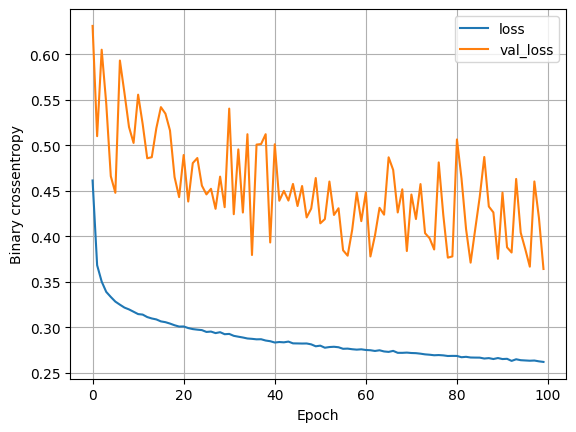

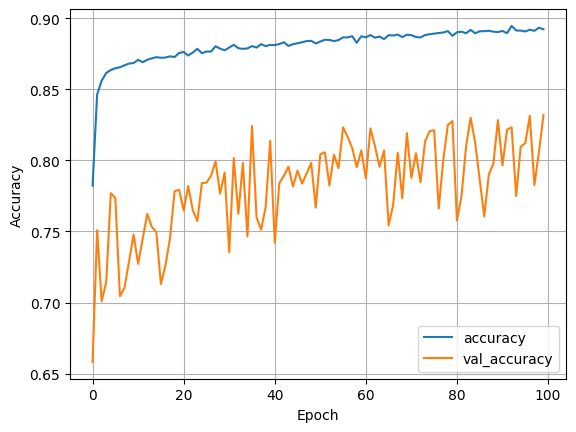

In [23]:
plot_loss(history)
plot_accuracy(history)

In [12]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid') # the logistic equation graph 
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
  
  history = nn_model.fit(
    x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
  return nn_model, history

In [15]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  
  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, lr 0.01, batch size32


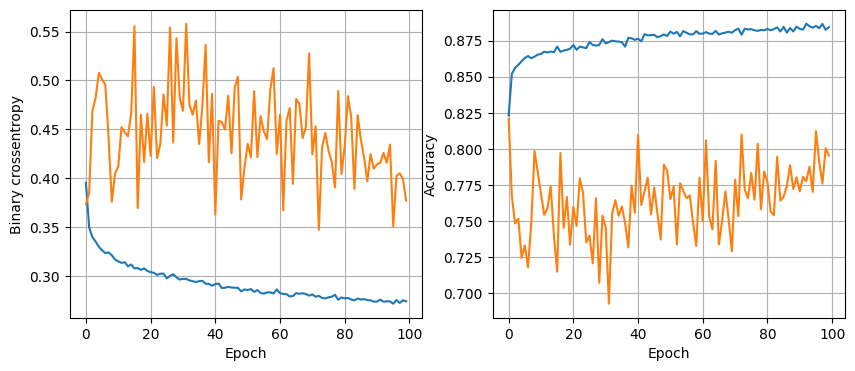

119/119 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.01, batch size64


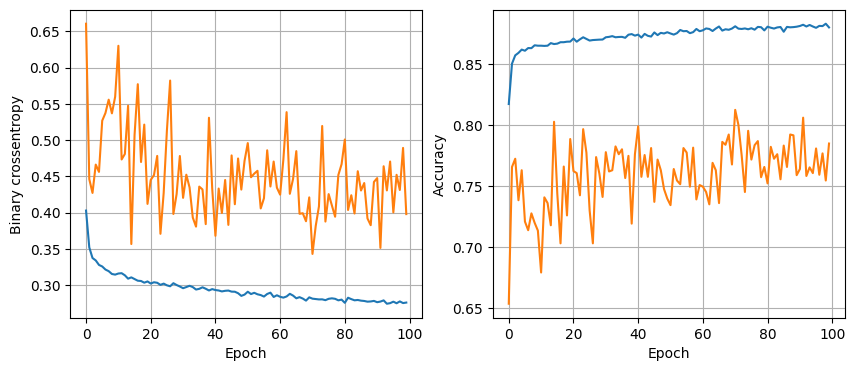

119/119 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.01, batch size128


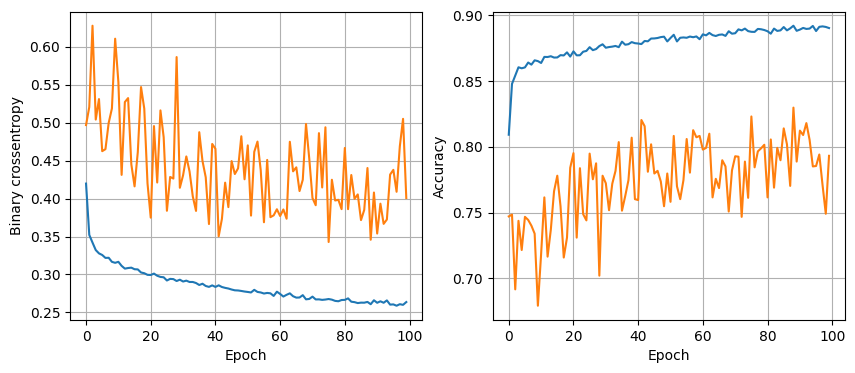

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch size32


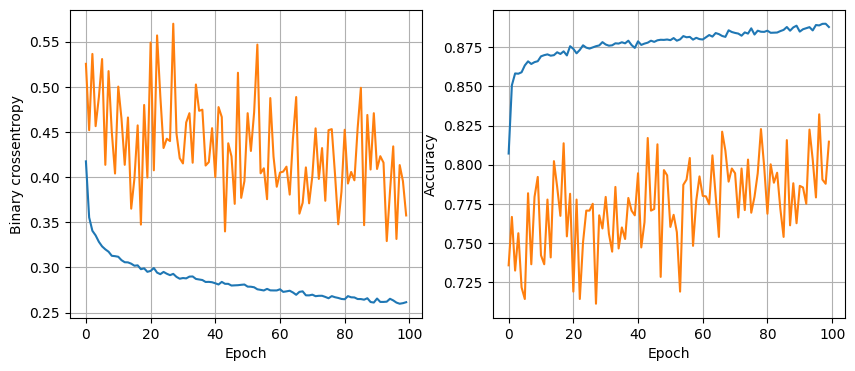

119/119 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch size64


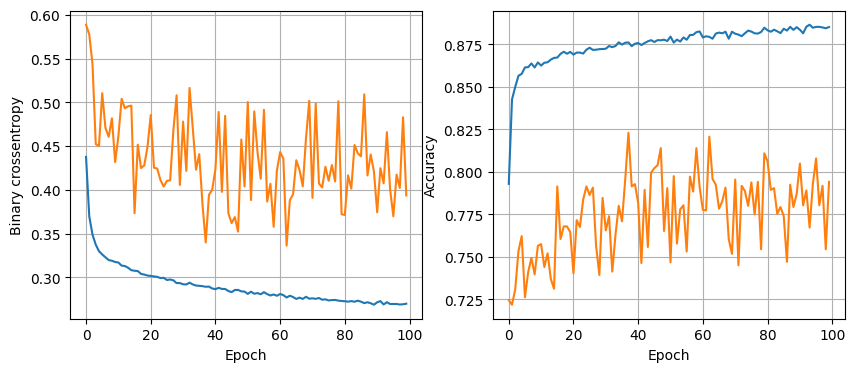

119/119 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8651
16 nodes, dropout 0, lr 0.005, batch size128


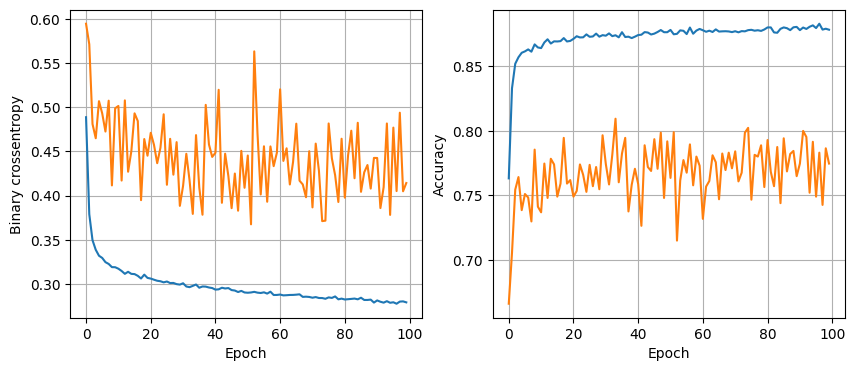

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.001, batch size32


KeyboardInterrupt: ignored

In [20]:
# from keras.optimizers.legacy.adam import NonFusedAdam
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size{batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [21]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 968us/step


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1338
           1       0.88      0.92      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

